<a href="https://colab.research.google.com/github/Nanda-Kumar-Reddy/HousePricePrediction_tfdf/blob/main/House_Price_Prediction_Major_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow_decision_forests

INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 93.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 49.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 55.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 50.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 49.9 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.0
    Uninstalling tensorboard-2.17.0:
      Successfully uninstalled tensorboard-2.17.0
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: tensorflow
    Found existing installatio

In [2]:
import pandas as pd
import numpy as np
import tensorflow_decision_forests as tfdf
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
file_path = 'data.csv'
df = pd.read_csv(file_path)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [5]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [7]:
df.fillna(0, inplace=True)

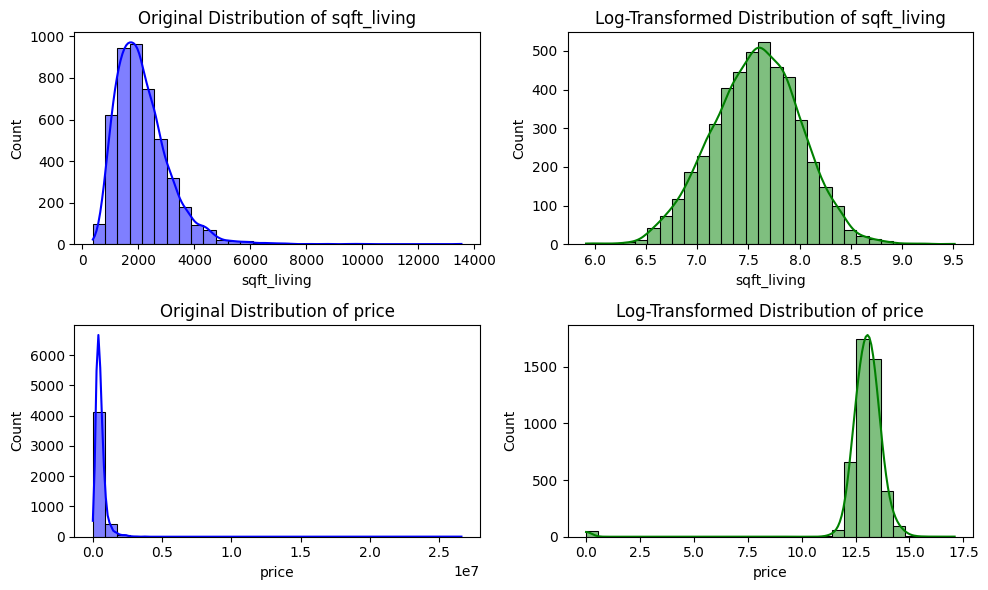

In [8]:
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
sns.histplot(df['sqft_living'], bins=30, kde=True, color='blue')
plt.title('Original Distribution of sqft_living')

plt.subplot(2, 2, 2)
sns.histplot(np.log1p(df['sqft_living']), bins=30, kde=True, color='green')
plt.title('Log-Transformed Distribution of sqft_living')

plt.subplot(2, 2, 3)
sns.histplot(df['price'], bins=30, kde=True, color='blue')
plt.title('Original Distribution of price')

plt.subplot(2, 2, 4)
sns.histplot(np.log1p(df['price']), bins=30, kde=True, color='green')
plt.title('Log-Transformed Distribution of price')

plt.tight_layout()
plt.show()

In [9]:
df['log_sqft_living'] = np.log1p(df['sqft_living'])
df['log_price'] = np.log1p(df['price'])

In [10]:
label_encoder = LabelEncoder()
for col in ['street', 'city', 'statezip', 'country']:
    df[col] = label_encoder.fit_transform(df[col])

In [11]:
df = df.drop(columns=['price', 'date', 'sqft_living'])

In [12]:
scaler = StandardScaler()
scaled_features = ['log_sqft_living', 'sqft_above', 'sqft_basement', 'bathrooms', 'bedrooms', 'floors', 'yr_built', 'yr_renovated']
df[scaled_features] = scaler.fit_transform(df[scaled_features])

In [13]:
df['rooms_per_floor'] = df['bedrooms'] / (df['floors'] + 1)
df['bath_per_bed'] = df['bathrooms'] / (df['bedrooms'] + 1)
df['living_per_bedroom'] = df['log_sqft_living'] / (df['bedrooms'] + 1)
df['sqft_lot_per_floor'] = df['sqft_lot'] / (df['floors'] + 1)

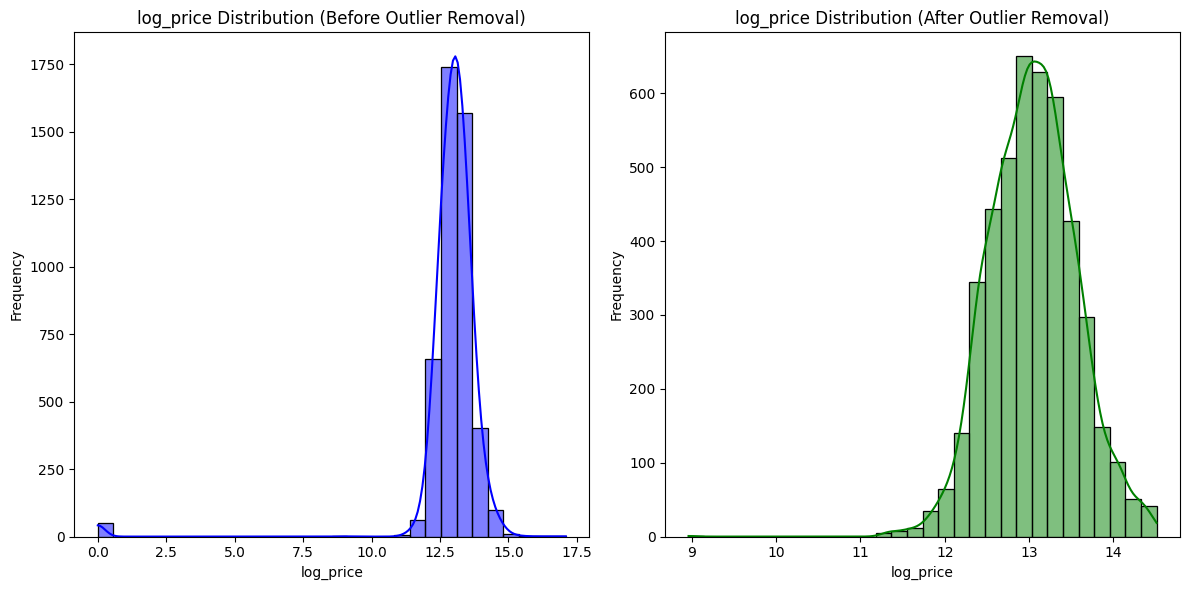

In [14]:
df_original = df.copy()

df_filtered = df_original[(df_original['log_price'] < df_original['log_price'].quantile(0.99)) &
                          (df_original['log_price'] > df_original['log_price'].quantile(0.01))]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df_original['log_price'], bins=30, kde=True, color='blue')
plt.title('log_price Distribution (Before Outlier Removal)')
plt.xlabel('log_price')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df_filtered['log_price'], bins=30, kde=True, color='green')
plt.title('log_price Distribution (After Outlier Removal)')
plt.xlabel('log_price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [15]:
df = df[(df['log_price'] < df['log_price'].quantile(0.99)) & (df['log_price'] > df['log_price'].quantile(0.01))]

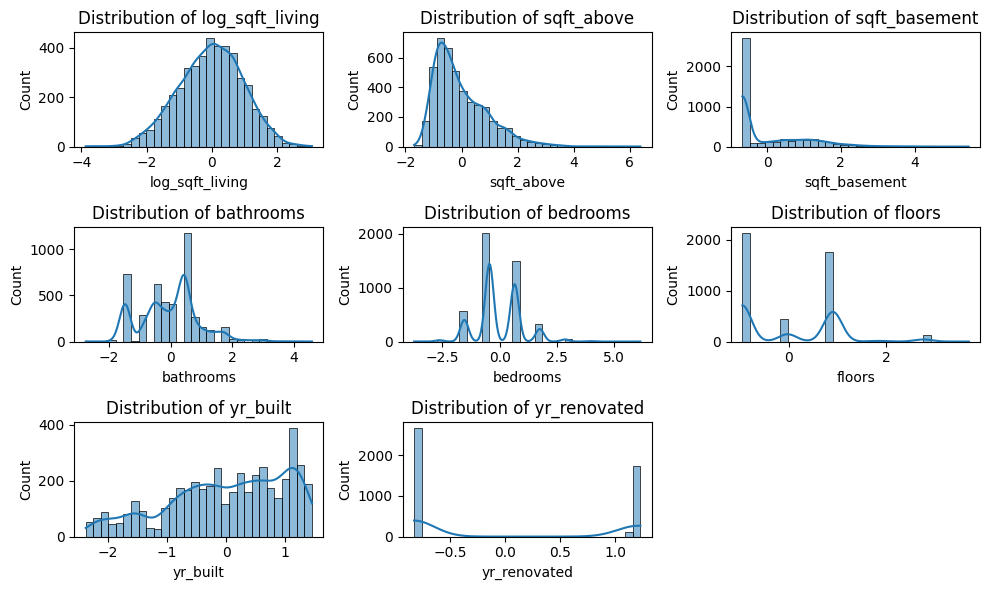

In [16]:
plt.figure(figsize=(10, 6))
for i, feature in enumerate(scaled_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f"Distribution of {feature}")
plt.tight_layout()
plt.show()

In [17]:
model = tfdf.keras.GradientBoostedTreesModel(
    task=tfdf.keras.Task.REGRESSION,
    num_trees=2000,
    max_depth=10,
    shrinkage=0.01,
    subsample=0.8
)


Use /tmp/tmpdbdotcnp as temporary training directory


In [18]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score

Reading training dataset...
Training dataset read in 0:00:04.447996. Found 3604 examples.
Training model...
Model trained in 0:00:22.814191
Compiling model...
Model compiled.
1/1 [==============================] - 0s 109ms/step


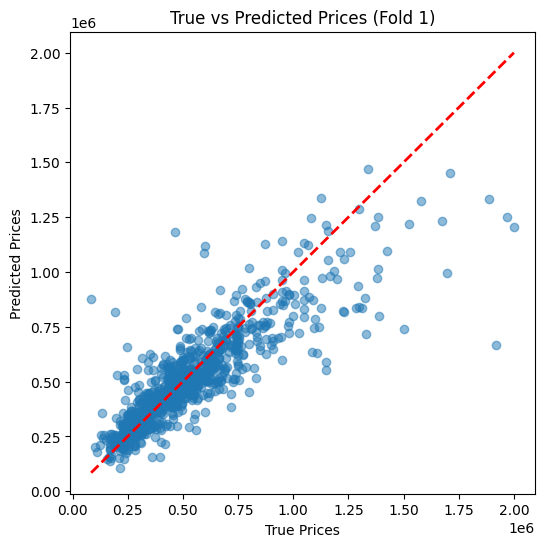

Reading training dataset...
Training dataset read in 0:00:00.063200. Found 3604 examples.
Training model...
Model trained in 0:00:01.731254
Compiling model...
Model compiled.
1/1 [==============================] - 0s 167ms/step


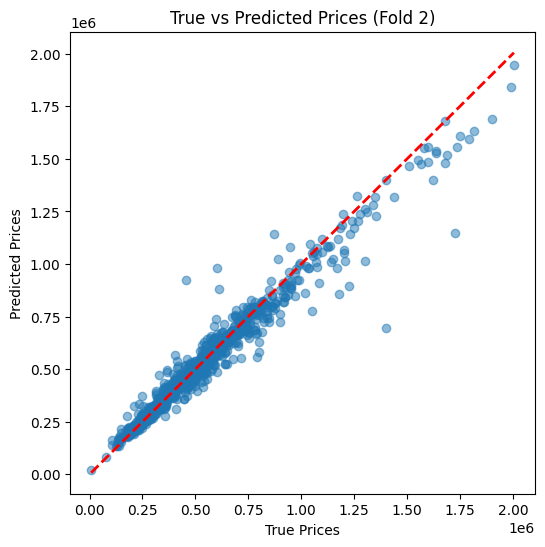

Reading training dataset...
Training dataset read in 0:00:00.058738. Found 3604 examples.
Training model...
Model trained in 0:00:02.239287
Compiling model...


Model compiled.


1/1 [==============================] - 0s 149ms/step


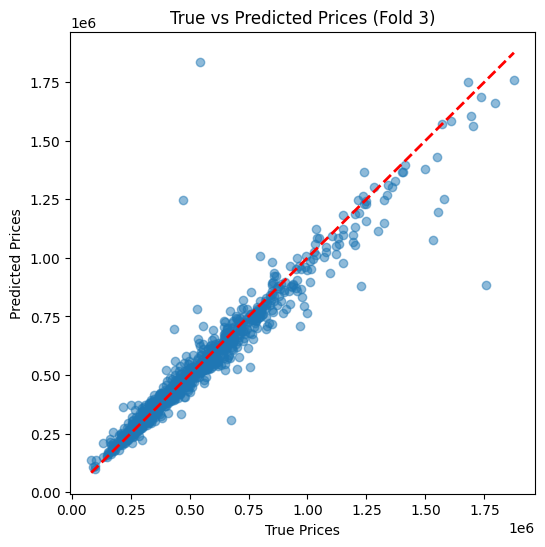

Reading training dataset...
Training dataset read in 0:00:00.061755. Found 3604 examples.
Training model...
Model trained in 0:00:01.348824
Compiling model...
Model compiled.
1/1 [==============================] - 0s 186ms/step


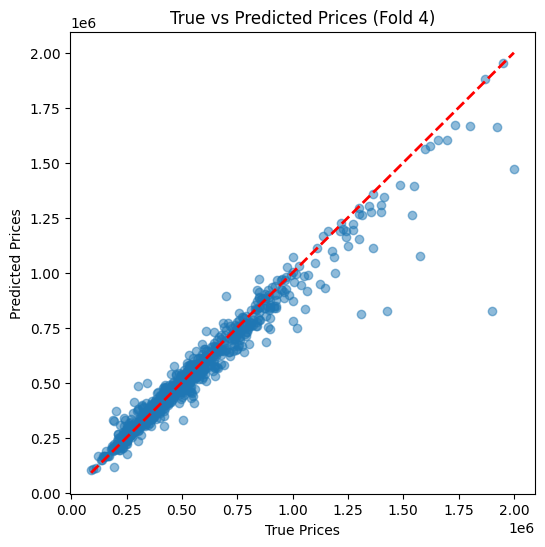

Reading training dataset...
Training dataset read in 0:00:00.058820. Found 3604 examples.
Training model...
Model trained in 0:00:01.367055
Compiling model...
Model compiled.
1/1 [==============================] - 0s 180ms/step


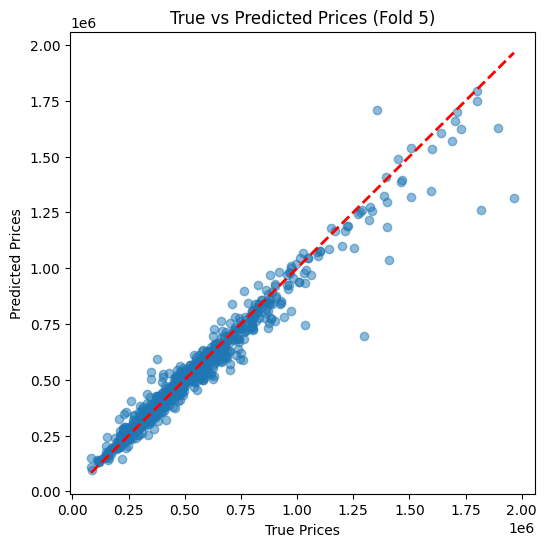

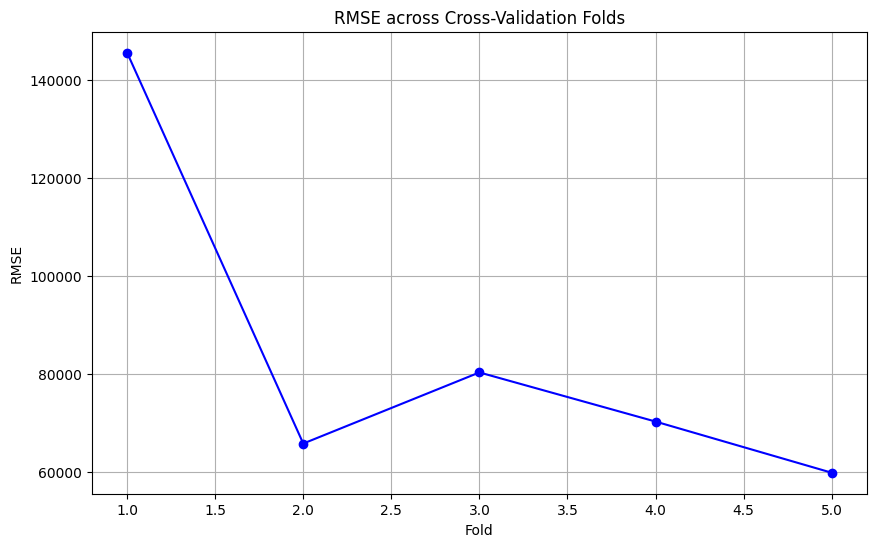

{'INV_MEAN_MIN_DEPTH': [("log_sqft_living" (1; #9), 0.2345144899192354), ("city" (1; #4), 0.16787092132979156), ("statezip" (1; #15), 0.16615572658738959), ("sqft_lot" (1; #13), 0.1475601110870126), ("sqft_above" (1; #11), 0.146161805301803), ("yr_built" (1; #19), 0.1417841245836703), ("sqft_lot_per_floor" (1; #14), 0.13891300885026867), ("living_per_bedroom" (1; #8), 0.13860297450787634), ("street" (1; #16), 0.1358617459637943), ("condition" (1; #5), 0.13573550665348613), ("view" (1; #17), 0.13282678883712076), ("bathrooms" (1; #2), 0.13108625621005937), ("bath_per_bed" (1; #1), 0.12301575238091618), ("sqft_basement" (1; #12), 0.12198631013077099), ("yr_renovated" (1; #20), 0.11999103071352617), ("waterfront" (1; #18), 0.11920098338547502), ("rooms_per_floor" (1; #10), 0.11710083621926096), ("bedrooms" (1; #3), 0.11517285122136763), ("floors" (1; #7), 0.11472244248527548)], 'SUM_SCORE': [("log_sqft_living" (1; #9), 16392.083138335485), ("statezip" (1; #15), 5556.313691129513), ("city"

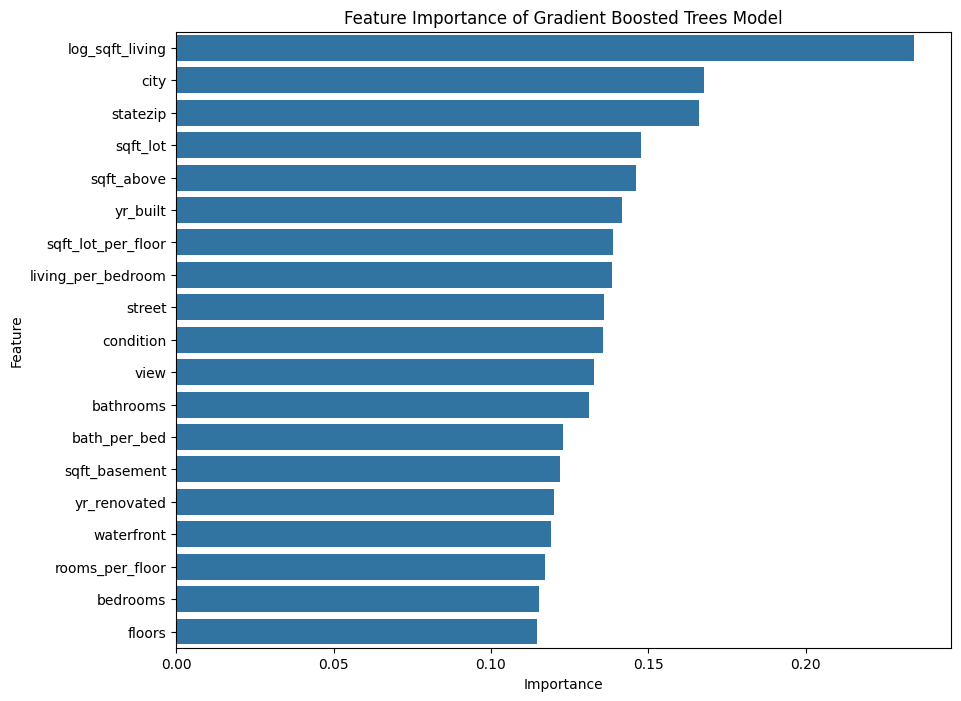

Cross-Validation RMSE: 84347.49753917241
Cross-Validation R²: 0.9006682478444921


In [19]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
rmses = []
r2_scores = []
fold = 1

for train_index, test_index in kf.split(df):
    train_data, test_data = df.iloc[train_index].copy(), df.iloc[test_index].copy()
    train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_data, label="log_price", task=tfdf.keras.Task.REGRESSION)
    test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_data, label="log_price", task=tfdf.keras.Task.REGRESSION)

    model.fit(train_ds)

    y_test = test_data['log_price']
    y_pred = model.predict(test_ds)


    y_pred_original_scale = np.expm1(y_pred)
    y_test_original_scale = np.expm1(y_test)

    rmse = np.sqrt(mean_squared_error(y_test_original_scale, y_pred_original_scale))
    rmses.append(rmse)

    r2 = r2_score(y_test_original_scale, y_pred_original_scale)
    r2_scores.append(r2)

    plt.figure(figsize=(6, 6))
    plt.scatter(y_test_original_scale, y_pred_original_scale, alpha=0.5)
    plt.plot([y_test_original_scale.min(), y_test_original_scale.max()],
             [y_test_original_scale.min(), y_test_original_scale.max()], 'r--', lw=2)
    plt.title(f"True vs Predicted Prices (Fold {fold})")
    plt.xlabel("True Prices")
    plt.ylabel("Predicted Prices")
    plt.show()

    fold += 1

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(rmses) + 1), rmses, marker='o', linestyle='-', color='b')
plt.title('RMSE across Cross-Validation Folds')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.grid(True)
plt.show()

inspector = model.make_inspector()
print(inspector.variable_importances())

feature_importance = inspector.variable_importances().get("INV_MEAN_MIN_DEPTH", [])

if feature_importance:
    feature_names = [entry[0].name for entry in feature_importance]
    importance_values = [entry[1] for entry in feature_importance]

    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importance_values
    })

    plt.figure(figsize=(10, 8))
    sns.barplot(x="Importance", y="Feature", data=feature_importance_df.sort_values(by="Importance", ascending=False))
    plt.title('Feature Importance of Gradient Boosted Trees Model')
    plt.show()
else:
    print("No feature importance data found.")

print(f"Cross-Validation RMSE: {np.mean(rmses)}")
print(f"Cross-Validation R²: {np.mean(r2_scores)}")


In [20]:
print(rmses)

[145478.95217867065, 65808.02257608778, 80303.24620834144, 70288.17591795388, 59859.09081480834]


In [21]:
print(f"Score: {np.mean(r2_scores)*100}")

Score: 90.06682478444921
